# Project Missing Migrants

In order to replicate the analysis, please do the following:

* Run all cells in this notebook.

The report is this notebook, with all outputs.

## Introduction

The Missing Migrants Project by International Organization for Migration (IOM) began in 2013. It publishes annual data tracking deaths of migrants, be it refugees or asylum-seekers, all of which have died en route to an international destination. The IOM group makes a point of establishing that whilst these data sets are becoming more precise, it is estimated that there is still a significant number of migrant deaths unaccounted.

The data so far is an accumulation of the past six years and can be downloaded at https://missingmigrants.iom.int/downloads

Go to this website and select 'download all data' as a '.csv' file. Now you should have the file *`MissingMigrants-Global-2020-XX-XXTXX-XX-XX.csv`* up to date. There is a copy of this file in our project directory (in our case *`MissingMigrants-Global-2020-02-19T13-35-27.csv`*).

Here we first replicate some of the analyses carried out by the Missing Migrants Project to obtain a first set of data to report on:
- The evolution from 2014 to 2020 in the number of migrant deaths
- The regions of incidents with the higher rates of deaths/missing people
- Evolution of those regions from 2014 to 2020
- Most common causes of death by region/year
- Demographic information by region/year
- Create a map with the location coordinates

We next investigate (some ideas):
- Number of survivors by region/year. In which regions do more people survive? Are they the same regions where more people die?
- Other data sets with information on outcomes related to migrants entering major destination countries in an irregular situation. What happens to people who eventually enter those destination countries? Do they go to jail? Are they deported to their country of origin? Are they given asylum? 

## Evolution of migration from 2014 to 2020

In [1]:
# The array package
import numpy as np
# Load the plotting package
import matplotlib.pyplot as plt
# Tell plotting package to show plots in the notebook
%matplotlib inline
# Make plots a little more fancy.
plt.style.use('fivethirtyeight')
# Load Pandas
import pandas as pd
# Load ipywidgets to make interactive graphs
import plotly.express as px

In [2]:
#Read the data set
missing_migrants = pd.read_csv('MissingMigrants-Global-2020-02-19T13-35-27.csv')
missing_migrants.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,52882,Southeast Asia,"February 11, 2020",2020,Feb,15.0,45.0,60,70.0,12.0,3.0,NaN,Drowning,"Bay of Bengal, off the coast of Saint Martin's...","BBC, Reuters","20.627155726956, 92.341686188729",NaN,"https://reut.rs/38trzdj, https://bbc.in/39ppH5...",South-eastern Asia,3
1,52883,Central America,"February 11, 2020",2020,Feb,1.0,NaN,1,7.0,NaN,1.0,NaN,Vehicle Accident,"Federal highway La Tinaja-Cosoleacaque, Veracr...","E-Consulta, El Sol de México","18.436161666740, -95.960317926108",NaN,"https://archive.ph/WnNpH, https://archive.ph/l...",Central America,3
2,52881,US-Mexico Border,"February 10, 2020",2020,Feb,3.0,NaN,3,2.0,3.0,NaN,NaN,Hypothermia,"Laguna mountains, near the Ewiiaapaayp Indian ...",US Border Patrol,"32.840370753891, -116.414121312760",NaN,"https://archive.ph/h9you, https://archive.ph/X...",Northern America,5
3,52887,US-Mexico Border,"February 10, 2020",2020,Feb,1.0,NaN,1,3.0,NaN,1.0,NaN,Vehicle Accident,"Road near El Quemado, Maverick County, Texas, USA","Extra, El Mercurio","28.943172657006, -100.621777660710",NaN,"https://archive.ph/jcCOx, https://archive.ph/7...",Northern America,3
4,52880,Mediterranean,"February 09, 2020",2020,Feb,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,Body recovered off the coast of Benabdelmalek ...,Réflexion,"36.193033464956, 0.215419367276",Western Mediterranean,https://archive.ph/xKPTa,Uncategorized,1


------------------------------------------------
The `Total Dead' and 'Missing` column contains numbers as strings with commas for the thousands marker. First, we will delete the comma and then we will convert the string values to integers.

Next, we will make a bar chart with the number of deaths and missing people from 2014 to 11th February 2020.

------------------

In [3]:
missing_migrants['Total Dead and Missing'] = missing_migrants['Total Dead and Missing'].str.replace(',', '').astype(int)

It is important to create a distinction between the total missing and dead, and the year they were reported.

In [4]:
#Evolution from 2014 to 2020 in the number of migrants dead or missing
by_year = missing_migrants.groupby(['Reported Year'])
years = by_year.sum()
deads_missing_by_year = pd.DataFrame(years['Total Dead and Missing'])
deads_missing_by_year.reset_index(level=0, inplace=True)

print('Total number of dead and missing from 2014 to Feb 2020:', sum(missing_migrants['Total Dead and Missing']))

#Plot 'deads_missing_by_year' using an interactive bar chart
fig = px.bar(deads_missing_by_year, x = 'Reported Year', y = 'Total Dead and Missing', title = 'Evolution from 2014 to Feb 2020 in the number of migrants dead or missing', width = 700, height = 400)
fig.show()

Total number of dead and missing from 2014 to Feb 2020: 35535


In [5]:
#The location coordinates, latitude and longitude, in the missing_migrants dataframe are together in the same column and are string values instead of numeric values.

#Therefore, we first need to split the column into two separate columns, Latitude and Longitude. We will create a new dataframe, 'coordinates'.
splited = missing_migrants['Location Coordinates'].str.split(', ')
data = splited.to_list()
columns = ['Latitude', 'Longitude']
coordinates = pd.DataFrame(data, columns=columns)
coordinates.head()

#We checked that the coordinates are actually strings instead of numeric values.
print('Latitude is numeric:', np.issubdtype(coordinates['Latitude'].dtype, np.number))
print('Longitude is numeric:', np.issubdtype(coordinates['Longitude'].dtype, np.number))

#They are strings, so we need to convert them into float values.
coordinates = coordinates.astype(float)
coordinates.head()

Latitude is numeric: False
Longitude is numeric: False


,Latitude,Longitude
0,20.627156,92.341686
1,18.436162,-95.960318
2,32.840371,-116.414121
3,28.943173,-100.621778
4,36.193033,0.215419


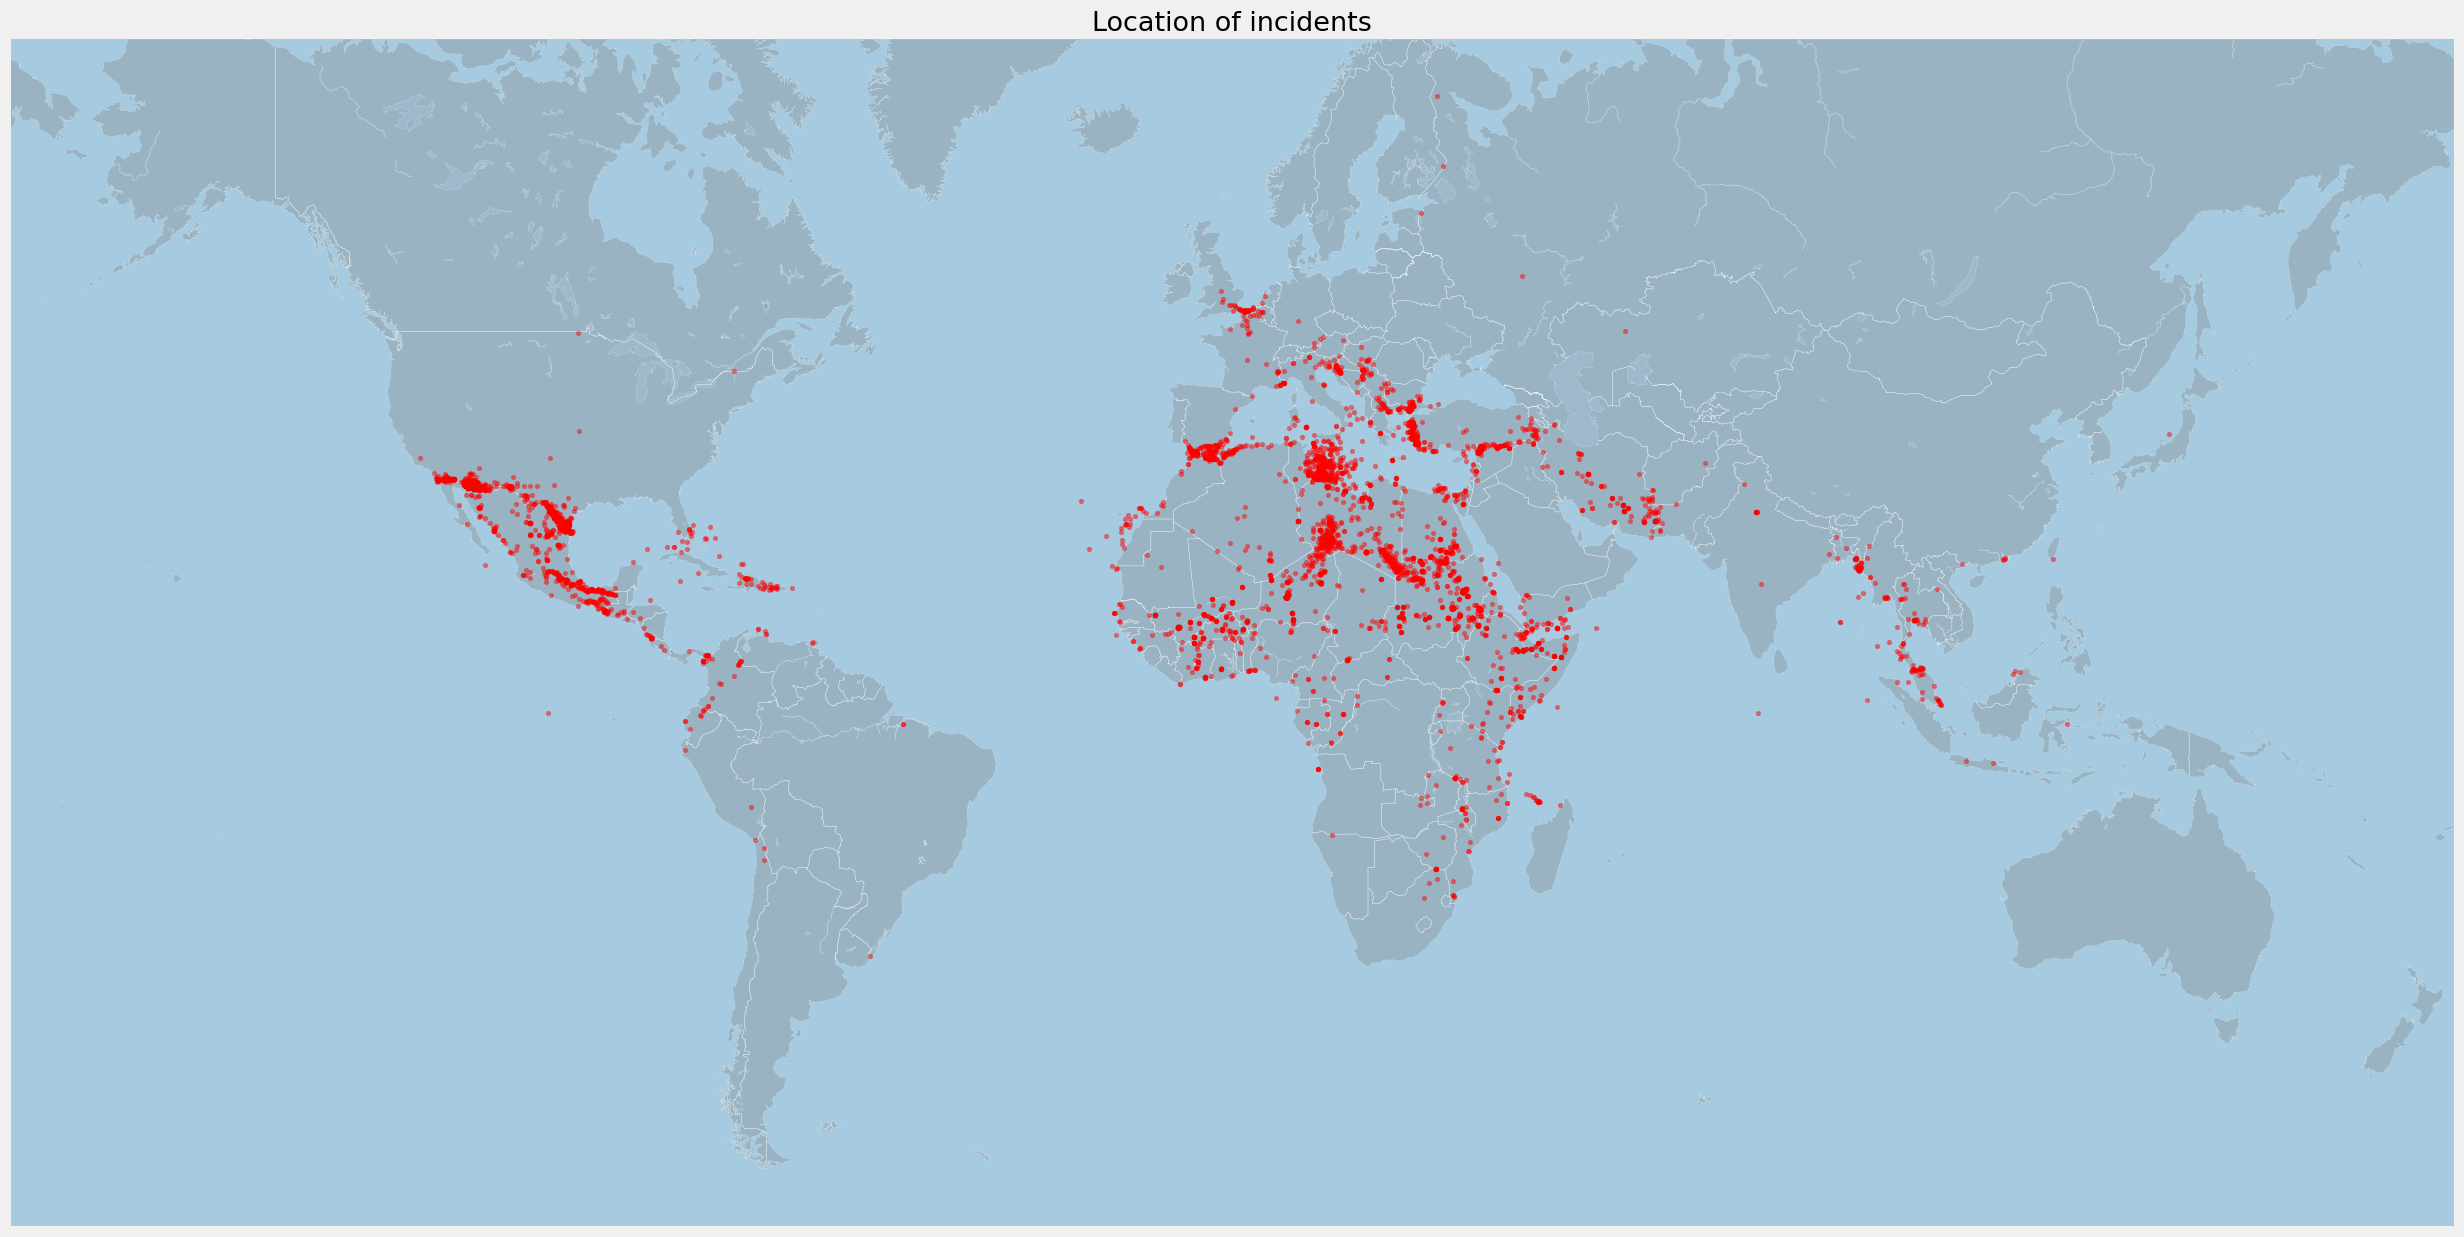

In [6]:
# Now we will plot the locations of the incidents into a world map using Basemap. We followed the Basemap guide offered by matplotlib: https://matplotlib.org/basemap/api/basemap_api.html

from mpl_toolkits.basemap import Basemap

#First, we use the Mercator projection to display the background world map, adjusting some of the parameters for a better visualization of the data
plt.figure(figsize=(26,19), dpi = 54)
m = Basemap(projection='merc', llcrnrlat=-60,urcrnrlat=70,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='l')
m.drawcoastlines(linewidth=0.1, color='white')
m.drawcountries(linewidth = 0.3, color = 'white')
m.fillcontinents(color='grey', alpha=0.3, lake_color = '#A6CAE0')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)

#Then we use a for loop to plot every incident coordinates -longitude and latitude- into our world map.
for i in np.arange(len(coordinates['Longitude'])):
    lon = coordinates['Longitude'].iloc[i] #, coordinates['Latitude']) #lon, lat)
    lat = coordinates['Latitude'].iloc[i] #, coordinates['Latitude'], 'ko')
    xpt, ypt = m(lon, lat)
    m.plot(xpt, ypt, 'ro', markersize = 2.5, alpha=0.4)


plt.title('Location of incidents', size = 18)
plt.show()

According to the U.S. Customs and Border Protection, over 7000 people have died whilst attempting to cross the U.S/ Mexico border illelaly in the past ten years. It is easier to understand the origins of migrants between these two borders, but often significantly harder for countries such as Italy, limiting the knowledge for the cause of migration.  In addition, given their legal status it is possible that many more have become victims during the difficult migration. Here we are looking at the total number of fatalities per region.

In [7]:
fatalities_by_region = missing_migrants.groupby('Region of Incident')['Total Dead and Missing'].sum().sort_values(ascending=False)
fatalities_by_region

Region of Incident
Mediterranean         19902
North Africa           4541
US-Mexico Border       2440
Southeast Asia         2429
Sub-Saharan Africa     1916
Horn of Africa         1183
Central America         701
Caribbean               666
Europe                  588
Middle East             577
South Asia              397
South America           104
Central Asia             52
East Asia                36
North America             3
Name: Total Dead and Missing, dtype: int64

Looking at the total number of fatalities for every region from 2014 to 2020 could give us a clue as to where these incidents are more likely to occur.

In [8]:
by_region_year = missing_migrants.groupby(['Reported Year','Region of Incident'])['Total Dead and Missing'].sum()
df_by_region_year = pd.DataFrame(by_region_year).reset_index()
df_by_region_year.head()

,Reported Year,Region of Incident,Total Dead and Missing
0,2014,Caribbean,73
1,2014,Central America,116
2,2014,East Asia,9
3,2014,Europe,22
4,2014,Horn of Africa,265


In [9]:
#Migrants Missing or Dead by Region and year.
fig = px.bar(df_by_region_year, x = 'Total Dead and Missing', y = 'Reported Year', color='Region of Incident', barmode = 'stack', orientation='h', title = 'Migrants Missing or Dead by Region', width = 1500, height = 400)
fig.show()

------------------
Now we want to know the top 20 causes of death. First, we will create a *recoding function* to recode some of the values in the `Cause of Death` column, because they are classified as different categories that can be actually grouped as just one (e.g. 'Probable drowning', 'Presumed Drowning' and 'Drowning' can be classified as 'Drowning/presumed drowning'). In addition, there are some missing values in the `Cause of Death` column and we will replace them with 'x' to be able to apply the function.

------------------------

In [10]:
#Number of missing values (NaN) from the 'Cause of Death' column
print('No of "Cause of Death" NaN values:', missing_migrants['Cause of Death'].isna().sum())

#Rows with missing values
print(missing_migrants['Cause of Death'][missing_migrants['Cause of Death'].isnull()])

No of "Cause of Death" NaN values: 3
404    NaN
526    NaN
601    NaN
Name: Cause of Death, dtype: object


We also needed to redefine missing information (NaN) with a variable that would allow us a clearer understanding.

In [11]:
#Replace NaN with 'x' and check that it was done right
missing_migrants['Cause of Death'].fillna('x', inplace = True)
missing_migrants.loc[[404, 526, 601], 'Cause of Death']

404    x
526    x
601    x
Name: Cause of Death, dtype: object

The data needs to be easier to comprehend, so they need to be renamed. This will encompass similar causes of deaths into a single defining category, allowing it to be easier to understand the relations between incidents.

In [12]:
def classify_death(series):
    if series.startswith('Sickness and lack of access to medicine') | series.startswith('Sickness'):
        return 'Sickness/lack of access to medicine'
    if series.startswith('Starvation'):
        return 'Starvation'
    if series.startswith('Hyperthermia') | series.startswith('Probable hyperthermia') | series.startswith('Presumed hyperthermia'):
        return 'Hyperthermia/presumed hyperthermia'
    if series.startswith('Shot, Stabbed') | series.startswith('Shot, stabbed'):
        return 'Shot or stabbed'
    if series.startswith('Excessive Physical Abuse') | series.startswith('Violence'):
        return 'Physical Abuse'
    if series.startswith('Unknown'):
        return 'Unknown'
    if series.startswith('Vehicle'):
        return 'Vehicle accident'
    if series.startswith('Hit by'):
        return 'Hit by vehicle/train'
    if series.startswith('Fall from'):
        return 'Fall from vehicle/train'
    if series.startswith('Drowning') | series.startswith('Presumed drowning'):
        return 'Drowning/presumed drowning'
    if series.startswith('Dehydration'):
        return 'Dehydration'
    if series.startswith('Electrocution'):
        return 'Electrocution'
    if series.startswith('Harsh weather/lack of adequate shelter'):
        return 'Harsh weather/lack of adequate shelter'
    else:
        return series

--------------------------
##### Top 20 causes of death

In [13]:
missing_migrants['Cause of Death'] = missing_migrants['Cause of Death'].apply(classify_death)
cause_death_20= missing_migrants['Cause of Death'].value_counts().head(20)
cause_death_20

Drowning/presumed drowning                1620
Unknown                                   1270
Sickness/lack of access to medicine       1123
Vehicle accident                           564
Starvation                                 281
Dehydration                                195
Shot                                       191
Hyperthermia/presumed hyperthermia         143
Hit by vehicle/train                       134
Shot or stabbed                            127
Physical Abuse                             119
Fall from vehicle/train                     95
Hypothermia                                 91
Suffocation                                 47
Train Accident                              40
Murdered                                    38
Harsh weather/lack of adequate shelter      35
Mixed                                       28
Harsh conditions                            25
Cardiac arrest                              22
Name: Cause of Death, dtype: int64

Next, we wanted to establish whether there was a correlation between the region of incident and the number of deaths. What are the chances that you survive if you choose a certain route to migrate?

First we will inspect the NaN values in the categories of interest: *"Number of Survivors", "Total Dead and Missing", "Number Dead"* and *"Minimum Estimated Number of Missing"*.

Then, we will create a new data set without NaN values for these columns because we want to calculate, as accurately as possible, the proportion of people that die out of the total number of migrants.

In [14]:
print('No of "Number of Survivors" NaN values:', missing_migrants['Number of Survivors'].isna().sum())
print('No of "Total Dead and Missing" NaN values:', missing_migrants['Total Dead and Missing'].isna().sum())
print('No of "Number Dead" NaN values:', missing_migrants['Number Dead'].isna().sum())
print('No of "Minimum Estimated Number of Missing" NaN values:', missing_migrants['Minimum Estimated Number of Missing'].isna().sum())
print('Length of missing_migrants dataset:', len(missing_migrants))

No of "Number of Survivors" NaN values: 5488
No of "Total Dead and Missing" NaN values: 0
No of "Number Dead" NaN values: 243
No of "Minimum Estimated Number of Missing" NaN values: 5827
Length of missing_migrants dataset: 6433


In [15]:
missing = missing_migrants['Minimum Estimated Number of Missing']
survivors = missing_migrants['Number of Survivors']
deaths = missing_migrants['Number Dead']
year = missing_migrants['Reported Year']

new_migrants = pd.DataFrame()
new_migrants['region of incident'] = missing_migrants['Region of Incident']
new_migrants['survivors'] = survivors
new_migrants['deaths'] = deaths
new_migrants['missing'] = missing
new_migrants['total dead and missing'] = missing_migrants['Total Dead and Missing']
new_migrants['year'] = year

new_migrants.dropna(inplace = True)
print('Length of the new_migrants data set:', len(new_migrants))
new_migrants.head()

Length of the new_migrants data set: 278


,region of incident,survivors,deaths,missing,total dead and missing,year
0,Southeast Asia,70.0,15.0,45.0,60,2020
7,North Africa,18.0,2.0,7.0,9,2020
22,Mediterranean,1.0,3.0,2.0,5,2020
26,Southeast Asia,10.0,1.0,9.0,10,2020
38,Mediterranean,21.0,12.0,17.0,29,2020



In 2018/19 the Home Office reported that there had been a rise in hate crimes by at least ten percent in England and Wales. Much like this data being analysed, the statistics that can be understood from those reports are reliant on reportings, meaning that they are not limited to the number on the bottom line. 

Given the deaths found and reported over the years, we wanted to predict what the survival rate of migrants who were attempting to enter a region. In addition, we wanted to guess the fatality rate of those who attepted the perilous journey.

In [16]:
new_migrants['total migrants'] = new_migrants['survivors'] + new_migrants['total dead and missing']
new_migrants['fatalities rate'] = new_migrants['total dead and missing'] / new_migrants['total migrants']
new_migrants['survival rate'] = new_migrants['survivors'] / new_migrants['total migrants']
new_migrants.head()

,region of incident,survivors,deaths,missing,total dead and missing,year,total migrants,fatalities rate,survival rate
0,Southeast Asia,70.0,15.0,45.0,60,2020,130.0,0.461538,0.538462
7,North Africa,18.0,2.0,7.0,9,2020,27.0,0.333333,0.666667
22,Mediterranean,1.0,3.0,2.0,5,2020,6.0,0.833333,0.166667
26,Southeast Asia,10.0,1.0,9.0,10,2020,20.0,0.500000,0.500000
38,Mediterranean,21.0,12.0,17.0,29,2020,50.0,0.580000,0.420000


In [17]:
region_fatalities = new_migrants.groupby(['year','region of incident'])['fatalities rate'].mean()
region_survival = new_migrants.groupby(['year','region of incident'])['survival rate'].mean()
df_region = pd.DataFrame(region_fatalities).reset_index()
df_region_survival = pd.DataFrame(region_survival).reset_index()
df_region['survival rate'] = df_region_survival['survival rate']
df_region.head()

,year,region of incident,fatalities rate,survival rate
0,2014,Caribbean,0.485313,0.514687
1,2014,Europe,0.790476,0.209524
2,2014,Horn of Africa,1.000000,0.000000
3,2014,Mediterranean,0.556039,0.443961
4,2014,Middle East,0.863636,0.136364


In [18]:
is_medit = df_region['region of incident'] == 'Mediterranean'
is_medit
df_is_medit = pd.DataFrame(df_region[is_medit])
df_is_medit

,year,region of incident,fatalities rate,survival rate
3,2014,Mediterranean,0.556039,0.443961
13,2015,Mediterranean,0.411410,0.588590
18,2016,Mediterranean,0.510392,0.489608
25,2017,Mediterranean,0.499478,0.500522
31,2018,Mediterranean,0.571840,0.428160
39,2019,Mediterranean,0.401299,0.598701
45,2020,Mediterranean,0.389544,0.610456


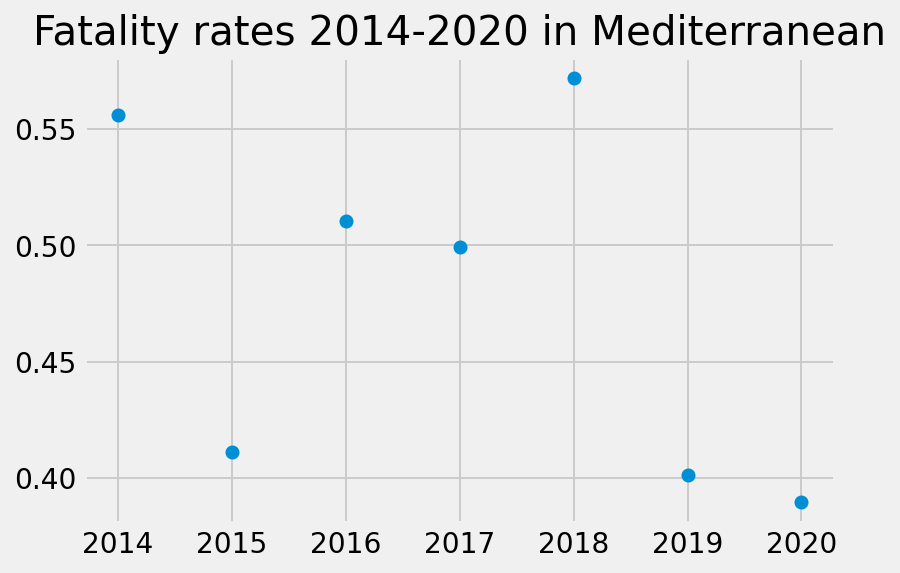

In [19]:
year = np.array(df_is_medit['year'])
fatality_rate = np.array(df_is_medit['fatalities rate'])
plt.plot(year,fatality_rate,'o')
plt.title('Fatality rates 2014-2020 in Mediterranean')
plt.show()

In [20]:
from scipy.stats import linregress
linregress(year, fatality_rate)


LinregressResult(slope=-0.01636649608208152, intercept=33.48836567557621, rvalue=-0.46596443014135147, pvalue=0.29195706367625934, stderr=0.013898398241742006)